<a href="https://colab.research.google.com/github/MerkulovDaniil/sber21_fmin/blob/sources/notebooks/Basic_tools_for_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear programming
A linear program is an optimization problem with a linear objective and affine inequality constraints. A common standard form is the following:
$$  
    \begin{array}{ll}
    \mbox{minimize}   & c^Tx \\
    \mbox{subject to} & Ax \leq b.
    \end{array}
$$
Here $A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$, and $c \in \mathbb{R}^n$ are problem data and $x \in \mathbb{R}^{n}$ is the optimization variable. The inequality constraint $Ax \leq b$ is elementwise.

In [ ]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A@x0 + s0
c = -A.T@lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A@x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -15.220912605552895
A solution x is
[-1.10133381 -0.16360111 -0.89734939  0.03216603  0.6069123  -1.12687348
  1.12967856  0.88176638  0.49075229  0.8984822 ]
A dual solution is
[6.98804566e-10 6.11756416e-01 5.28171747e-01 1.07296862e+00
 3.93758849e-09 2.30153870e+00 4.25704004e-10 7.61206896e-01
 8.36905607e-09 2.49370377e-01 1.30187004e-09 2.06014070e+00
 3.22417207e-01 3.84054343e-01 1.59493641e-09]


In [ ]:
# The list of available solvers
print(cp.installed_solvers())

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']


Comparison of solvers

|         | LP | QP | SOCP | SDP | EXP | MIP |
|:-------:|:--:|:--:|:----:|:---:|:---:|:---:|
|   CBC   |  X |    |      |     |     |  X  |
|   GLPK  |  X |    |      |     |     |     |
| GLPK_MI |  X |    |      |     |     |  X  |
|   OSQP  |  X |  X |      |     |     |     |
|  CPLEX  |  X |  X |   X  |     |     |  X  |
|   NAG   |  X |  X |   X  |     |     |     |
|   ECOS  |  X |  X |   X  |     |  X  |     |
|  GUROBI |  X |  X |   X  |     |     |  X  |
|  MOSEK  |  X |  X |   X  |  X  |  X  |  X* |
|  CVXOPT |  X |  X |   X  |  X  |     |     |
|   SCS   |  X |  X |   X  |  X  |  X  |     |
|   SCIP  |  X |  X |   X  |     |     |  X  |
|  XPRESS |  X |  X |   X  |     |     |  X  |

(*) Except mixed-integer SDP.

### Time comparison


GLPK failed with n = 10
GLPK failed with n = 20
GLPK failed with n = 30
GLPK failed with n = 40
GLPK failed with n = 50
GLPK failed with n = 60
GLPK failed with n = 70
GLPK failed with n = 80
GLPK failed with n = 90
GLPK failed with n = 100
GLPK_MI failed with n = 10
GLPK_MI failed with n = 20
GLPK_MI failed with n = 30
GLPK_MI failed with n = 40
GLPK_MI failed with n = 50
GLPK_MI failed with n = 60
GLPK_MI failed with n = 70
GLPK_MI failed with n = 80
GLPK_MI failed with n = 90
GLPK_MI failed with n = 100


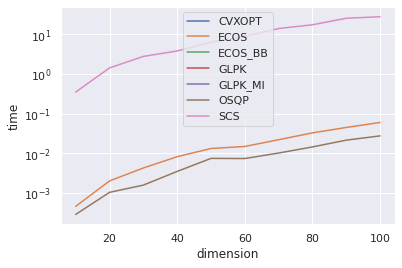

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import copy
sns.set()
for solver in cp.installed_solvers():
    times = []
    dimensions = [int(n) for n in np.linspace(10,100,10)]
    dimensions_final = copy.deepcopy(dimensions)
    for n in dimensions:
        m = int(1.5*n)
        np.random.seed(1)
        X = np.random.randn(m, n)
        y = np.random.randn(m)

        # Construct the problem.
        theta = cp.Variable(n)
        objective = cp.Minimize(cp.sum_squares(X*theta - y))
        constraints = [0 <= theta, theta <= 1]
        prob = cp.Problem(objective, constraints)
        try:
            prob.solve(solver=solver)
            times.append(prob.solver_stats.solve_time)
        except:
            dimensions_final.remove(n)
            print(f"{solver} failed with n = {n}")

    plt.semilogy(dimensions_final, times, label=solver)


plt.legend()
plt.xlabel('dimension')
plt.ylabel('time')
plt.show()

## ML frameworks

However, in practice for huge scale neural networks optimization we often use stochastic gradient methods, like SGD, ADAM, ADMM and etc.

![https://blog.exxactcorp.com/accelerated-automatic-differentiation-with-jax-how-does-it-stack-up-against-autograd-tensorflow-and-pytorch/](https://raw.githubusercontent.com/MerkulovDaniil/sber21_fmin/sources/images/mini_mlp_1024.png)

### Matrix multiplication

In [ ]:
import torch
import time
import tensorflow as tf
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

m = 100
n = int(1.5*m)
k = int(1.5*n)

A = torch.rand(m,n)
B = torch.rand(n,k)

start = time.time()
C = A@B
end = time.time()

print(f'PyTorch Matmul: {end - start:.5f}')

A = tf.random.normal((m,n))
B = tf.random.normal((n,k))

start = time.time()
C = A@B
end = time.time()

print(f'TF Matmul: {end - start:.5f}')

key = random.PRNGKey(0)
A = random.normal(key, (m,n))
B = random.normal(key, (n,k))

start = time.time()
C = A@B
end = time.time()

print(f'JAX Matmul: {end - start:.5f}')

PyTorch Matmul: 0.06130
TF Matmul: 1.40114
JAX Matmul: 0.00827


In [ ]:
A = torch.rand(m,n)
B = torch.rand(n,k)

print('PyTorch')
%timeit C = A@B

# ======
A = tf.random.normal((m,n))
B = tf.random.normal((n,k))

print('TF')
%timeit C = A@B
# ======

print(f'TF Matmul: {end - start:.5f}')

key = random.PRNGKey(0)
A = random.normal(key, (m,n))
B = random.normal(key, (n,k))

print('JAX')
%timeit C = A@B

PyTorch
The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 134 µs per loop
TF
The slowest run took 5.64 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 55.4 µs per loop
TF Matmul: 0.00827
JAX
1000 loops, best of 3: 338 µs per loop
JAX jit
The slowest run took 11.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 349 µs per loop


## Example

In this task you get acquinted with [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) for optimization

In [ ]:
def test_f(x):
    return x ** 2

To optimize function you should use scipy.optimize.minimize. For this method you should pass optimized function $f(x)$ and initial point $x_0$

In [ ]:
from scipy.optimize import minimize

In [ ]:
minimize(test_f, 10.0)

      fun: 1.7161984122524196e-15
 hess_inv: array([[0.50000001]])
      jac: array([-6.79528891e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([-4.14270251e-08])

To implement constrainted optimization we should pass additional bound and constraint arguments.  
In scipy it is conventional to use scipy.optimize.Bounds and scipy.optimize.LinearConstraint

In [ ]:
from scipy.optimize import Bounds
import numpy as np
our_bounds = Bounds(np.array([1.0]), np.array([5.0])) ### The first argument set lower bound, the second argument set upper bound 

Let's check optimization of our function with constraints

In [ ]:
minimize(test_f, [4.0], bounds=our_bounds)

      fun: array([1.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.99999999])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([1.])

Also, there are linear constraints $Ax \leq b$, which is implemented through scipy.optimize.LinearConstraint

In [ ]:
import numpy as np
from scipy.optimize import LinearConstraint
"""
First argument is A matrix, the second is lower bound vector and the third is upper bound vector
"""
linear_constraint = LinearConstraint ([[1]], [-np.inf], [1]) 

In [ ]:
minimize(test_f, [-4.0], constraints=linear_constraint)

     fun: 3.552706902540154e-17
     jac: array([2.98024361e-09])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-5.96045879e-09])